In this project, we're going to classify SMS text messages as spam or ham(not spam) by analysing the text present in them. We'll start by importing the necessary packages.

In [1]:
import numpy as np
import pandas as pd

Let's take a look at our data.

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Columns 2, 3 and 4 have a lot of missing values and don't seem to be intuitive or informative. Let's drop those.

In [4]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

We'll also rename our first two columns to make them sound more intuitive.

In [5]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Next, we'll numerically encode our target column as 0(ham) and 1(spam).

In [7]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Let's see if our dataframe contains any null values.

In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

Thankfully, it doesn't contain any. Let's look for duplicates now.

In [10]:
df.duplicated().sum()

403

Let's drop the 403 dulicated values that we have.

In [11]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

Finally, we have 5169 entries. Time to check how many of those are spam.

In [13]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

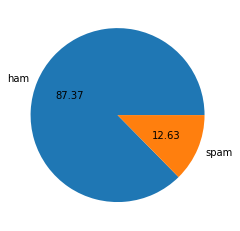

In [14]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

So, 87% of our entries are ham. That's a huge data imbalance, but since majority of the data that we encounter in the real world is ham, that seems okay.

Time to do some textual analysis on the data! Let's import the nltk library as it makes our process easier.

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Let's add a column to our dataframe which depicts the number of characters in the message.

In [16]:
df['text_len'] = df['text'].apply(len)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


Let's also add a column depicting number of words.

In [17]:
df['num_words'] = df['text'].apply(lambda text: len(nltk.word_tokenize(text)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df

,target,text,text_len,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


Finally, the number of sentences column!

In [19]:
df['num_sentences'] = df['text'].apply(lambda text: len(nltk.sent_tokenize(text)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,text,text_len,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


Let's have a look at a description of these columns.

In [20]:
df[['text_len', 'num_words', 'num_sentences']].describe()

,text_len,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


That's okay, but let's see if the trends differ for ham and spam entries.

In [21]:
ham_df = df[df['target'] == 0]
ham_df[['text_len', 'num_words', 'num_sentences']].describe()

,text_len,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


So, the mean number of characters in a ham message is 70. What could the mean for spam be?

In [22]:
spam_df = df[df['target'] == 1]
spam_df[['text_len', 'num_words', 'num_sentences']].describe()

,text_len,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


Whoa! The mean for spam is almost double! This could be a vital feature for classifying a message as spam or ham. Let's clarify this visually.

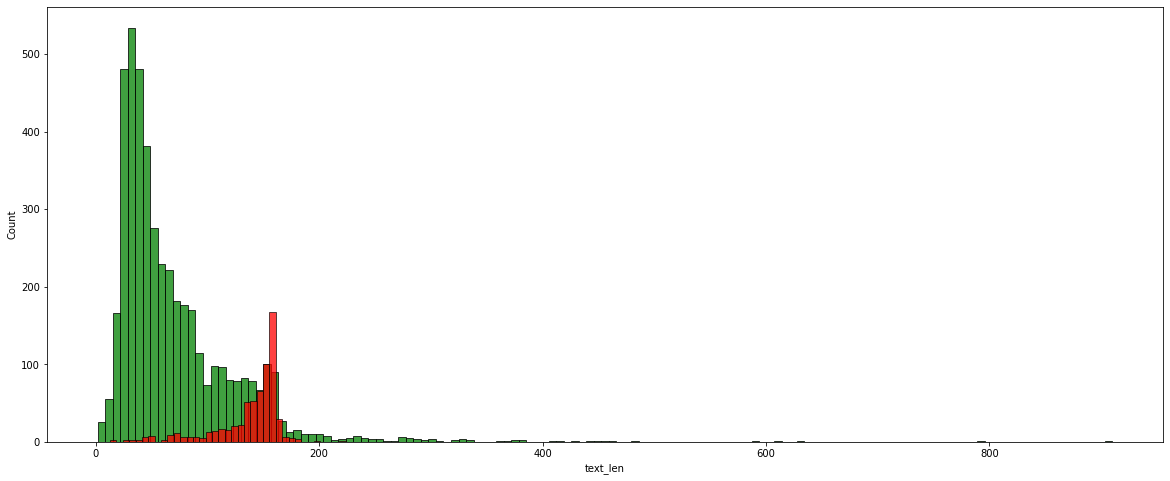

In [23]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.histplot(ham_df['text_len'], color = 'green')
sns.histplot(spam_df['text_len'], color = 'red')

Now, the difference is obvious. Let's also look at correlations between columns and where spam and ham points lie.

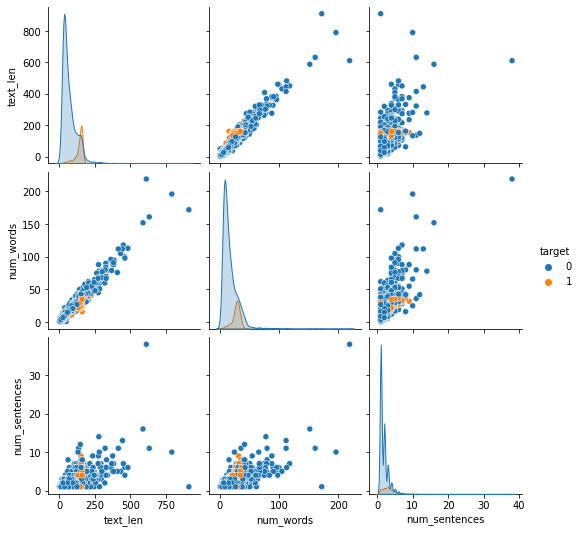

In [24]:
sns.pairplot(df, hue = 'target')

Text length seems to be a promising feature to aid in classification and there is a strong correlation between number of words and text length, as expected.

In [25]:
df.corr()

,target,text_len,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
text_len,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


Let's look at the correlations in the form of a heatmap.

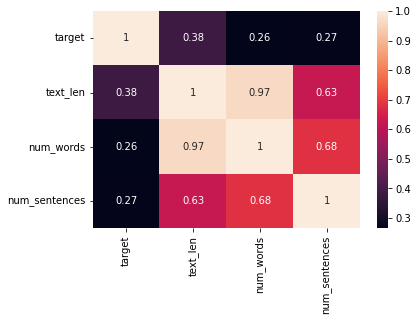

In [26]:
sns.heatmap(df.corr(), annot = True)

So, text length has the most correlation with the target and might hence be our best feature. The other two columns have a strong correlation with text length and therefore, might not provide a lot of additional information to help us in our classifiaction task.

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [28]:
import string
punctuation_marks = string.punctuation
punctuation_marks

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('running')

'run'

In [30]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  words = [word for word in text if word.isalnum()]
  words = [word for word in words if word not in stop_words and word not in punctuation_marks]
  words = [stemmer.stem(word) for word in words]
  text = ' '.join(words)
  return text

In [31]:
transform_text("Hi mate% , How are You? $how's it going?")

'hi mate go'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,text,text_len,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [33]:
from wordcloud import WordCloud
wc = WordCloud(height = 2000, width = 2000, min_font_size = 10)

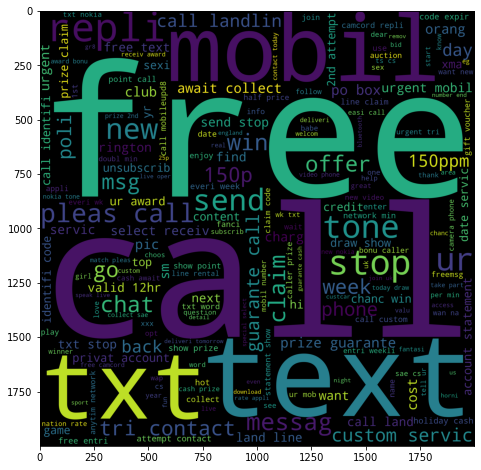

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

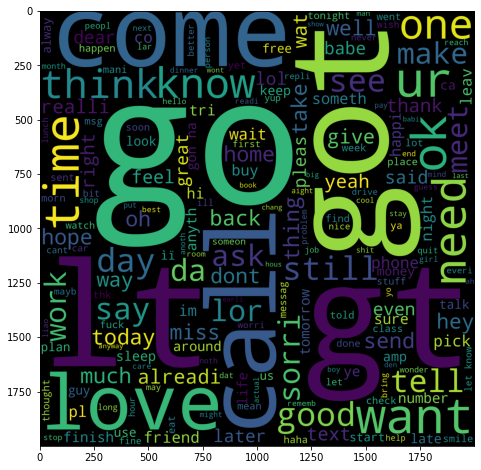

In [35]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [36]:
spam_df = df[df['target'] == 1]
spam_messages = spam_df['transformed_text'].tolist()
spam_messages[:5]

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info']

In [37]:
from collections import Counter

In [38]:
spam_counts = Counter()
for msg in spam_messages:
  words = msg.split()
  spam_counts.update(words)

In [39]:
common_spam_words = spam_counts.most_common(20)
common_spam_words

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


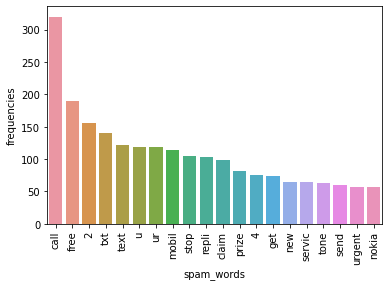

In [40]:
spam_counts_df = pd.DataFrame(common_spam_words)
sns.barplot(spam_counts_df[0], spam_counts_df[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('spam_words')
plt.ylabel('frequencies')
plt.show()

In [41]:
ham_df = df[df['target'] == 0]
ham_messages = ham_df['transformed_text'].tolist()
ham_messages[:5]

['go jurong point avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent']

In [42]:
ham_counts = Counter()
for msg in ham_messages:
  words = msg.split()
  ham_counts.update(words)

In [43]:
common_ham_words = ham_counts.most_common(20)
common_ham_words

[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('like', 234),
 ('know', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


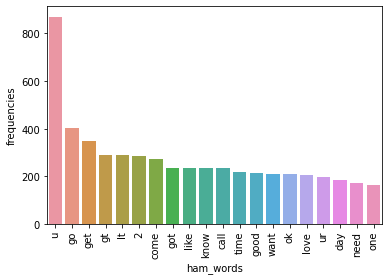

In [44]:
ham_counts_df = pd.DataFrame(common_ham_words)
sns.barplot(ham_counts_df[0], ham_counts_df[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('ham_words')
plt.ylabel('frequencies')
plt.show()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [73]:
cv = CountVectorizer()
tfidf = TfidfVectorizer
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6629)

In [63]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_test)
print(f'accuracy score = {accuracy_score(gnb_preds, y_test)}')
print(f'precision score = {precision_score(gnb_preds, y_test)}')
print(confusion_matrix(gnb_preds, y_test))

accuracy score = 0.867504835589942
precision score = 0.8918918918918919
[[765  16]
 [121 132]]


In [76]:
mnb.fit(X_train, y_train)
mnb_preds = mnb.predict(X_test)
print(f'accuracy score = {accuracy_score(mnb_preds, y_test)}')
print(f'precision score = {precision_score(mnb_preds, y_test)}')
print(confusion_matrix(mnb_preds, y_test))

accuracy score = 0.9748549323017408
precision score = 0.9324324324324325
[[870  10]
 [ 16 138]]


In [77]:
bnb.fit(X_train, y_train)
bnb_preds = bnb.predict(X_test)
print(f'accuracy score = {accuracy_score(bnb_preds, y_test)}')
print(f'precision score = {precision_score(bnb_preds, y_test)}')
print(confusion_matrix(bnb_preds, y_test))

accuracy score = 0.9661508704061895
precision score = 0.7905405405405406
[[882  31]
 [  4 117]]


In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [78]:
gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_test)
print(f'accuracy score = {accuracy_score(gnb_preds, y_test)}')
print(f'precision score = {precision_score(gnb_preds, y_test)}')
print(confusion_matrix(gnb_preds, y_test))

accuracy score = 0.867504835589942
precision score = 0.8918918918918919
[[765  16]
 [121 132]]


In [79]:
mnb.fit(X_train, y_train)
mnb_preds = mnb.predict(X_test)
print(f'accuracy score = {accuracy_score(mnb_preds, y_test)}')
print(f'precision score = {precision_score(mnb_preds, y_test)}')
print(confusion_matrix(mnb_preds, y_test))

accuracy score = 0.9748549323017408
precision score = 0.9324324324324325
[[870  10]
 [ 16 138]]


In [80]:
bnb.fit(X_train, y_train)
bnb_preds = bnb.predict(X_test)
print(f'accuracy score = {accuracy_score(bnb_preds, y_test)}')
print(f'precision score = {precision_score(bnb_preds, y_test)}')
print(confusion_matrix(bnb_preds, y_test))

accuracy score = 0.9661508704061895
precision score = 0.7905405405405406
[[882  31]
 [  4 117]]


In [81]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))